In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

import sys
sys.path.append("src")

#Import the VQE framework
from VQE_applications import *

#Setup directory
RESULTS_DIR = Path("results/12-5-Simeon")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

# Single-Qubit


SECTION X: SINGLE QUBIT – RANDOM INITIAL THETA VALUES
  -> random initial θ (1/20): 4.7218 rad
Iteration 0/100 (0.0%)
Iteration 10/100 (10.0%)
Iteration 20/100 (20.0%)
Iteration 30/100 (30.0%)
Iteration 40/100 (40.0%)
Iteration 50/100 (50.0%)
Iteration 60/100 (60.0%)
Iteration 70/100 (70.0%)
Iteration 80/100 (80.0%)
Iteration 90/100 (90.0%)
     Final Energy: -1.414206
  -> random initial θ (2/20): 3.6710 rad
Iteration 0/100 (0.0%)
Iteration 10/100 (10.0%)
Iteration 20/100 (20.0%)
Iteration 30/100 (30.0%)
Iteration 40/100 (40.0%)
Iteration 50/100 (50.0%)
Iteration 60/100 (60.0%)
Iteration 70/100 (70.0%)
Iteration 80/100 (80.0%)
Iteration 90/100 (90.0%)
     Final Energy: -1.414115
  -> random initial θ (3/20): 2.9904 rad
Iteration 0/100 (0.0%)
Iteration 10/100 (10.0%)
Iteration 20/100 (20.0%)
Iteration 30/100 (30.0%)
Iteration 40/100 (40.0%)
Iteration 50/100 (50.0%)
Iteration 60/100 (60.0%)
Iteration 70/100 (70.0%)
Iteration 80/100 (80.0%)
Iteration 90/100 (90.0%)
Converged at iterati

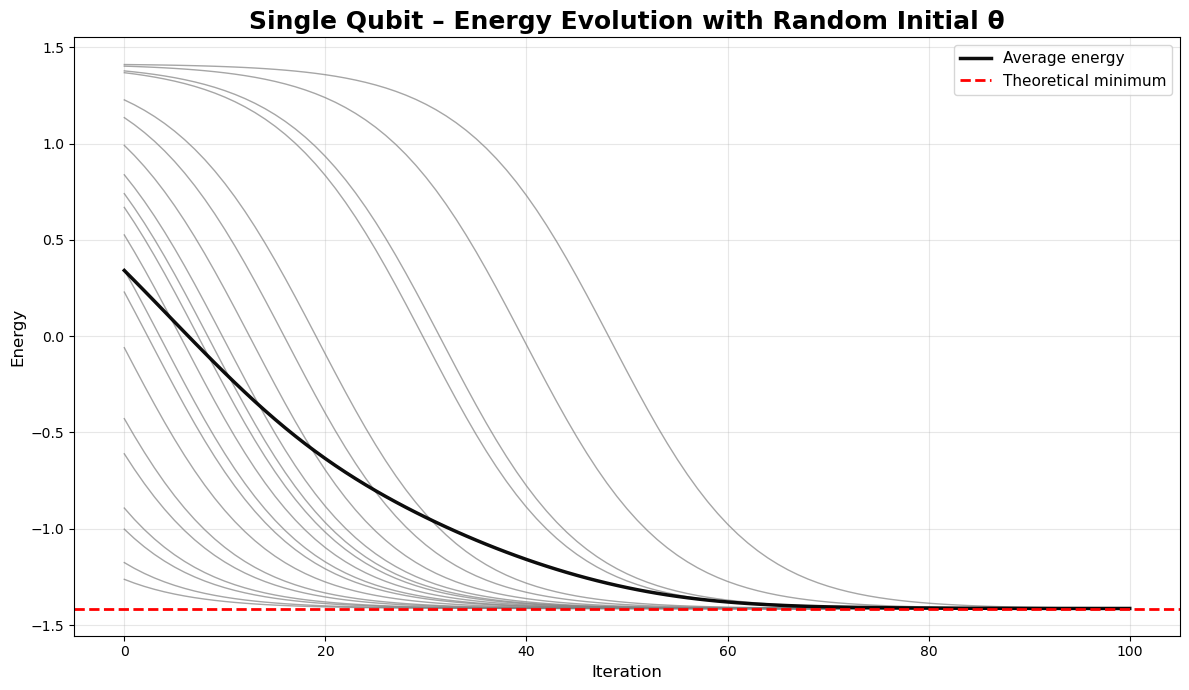

In [ ]:
print("\n" + "=" * 80)
print("SECTION X: SINGLE QUBIT – RANDOM INITIAL THETA VALUES")
print("=" * 80)

# Number of random initial θ values
k = 20   # you can change this

# Generate random initial parameters in [0, 2π)
initial_thetas = [np.array([np.random.uniform(0, 2*np.pi)]) for _ in range(k)]

# ---- run VQE for each random initial θ ----
results = []

for idx, theta0 in enumerate(initial_thetas):
    print(f"  -> random initial θ ({idx+1}/{k}): {theta0[0]:.4f} rad")

    vqe = VQE_OneQubit_FiniteDiff_Const(
        max_iter=100,
        learning_rate=0.05,
        gradient_eps=1e-6,
        store_history=True
    )

    theta_opt, E_opt = vqe.run(initial_params=theta0)

    results.append({
        "theta0": theta0,
        "theta_opt": theta_opt,
        "energy": E_opt,
        "history": vqe.history_energy,
    })

    print(f"     Final Energy: {E_opt:.6f}")


# ======================================================================
# PLOTTING (all runs in gray, mean in black, red dashed theoretical min)
# ======================================================================

plt.figure(figsize=(12, 7))
plt.title("Single Qubit – Energy Evolution with Random Initial θ",
          fontsize=18, fontweight='bold')

# collect histories
histories = [np.array(r["history"]) for r in results]

# make them same length & compute mean
max_len = max(len(h) for h in histories)
padded = np.array([
    np.pad(h, (0, max_len - len(h)), constant_values=np.nan)
    for h in histories
])
mean_history = np.nanmean(padded, axis=0)

# individual runs: thin gray lines
for h in histories:
    plt.plot(h, color='gray', linewidth=1.0, alpha=0.7)

# mean curve: thick black line
plt.plot(mean_history,
         color='black',
         linewidth=2.5,
         alpha=0.95,
         label='Average energy')

# theoretical minimum line: -sqrt(2)
plt.axhline(-np.sqrt(2),
            color='red',
            linestyle='--',
            linewidth=2,
            label='Theoretical minimum')

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


# Ising Modell


SECTION X: Ising (3 qubits) – RANDOM INITIAL THETA VALUES (Const.)
Exact ground-state energy: -2.500000
  -> random initial θ (1/2)
Iteration 0/400 (0.0%)
Iteration 10/400 (2.5%)
Iteration 20/400 (5.0%)
Iteration 30/400 (7.5%)
Iteration 40/400 (10.0%)
Iteration 50/400 (12.5%)
Iteration 60/400 (15.0%)
Iteration 70/400 (17.5%)
Iteration 80/400 (20.0%)
Iteration 90/400 (22.5%)
Iteration 100/400 (25.0%)
Iteration 110/400 (27.5%)
Iteration 120/400 (30.0%)
Iteration 130/400 (32.5%)
Iteration 140/400 (35.0%)
Iteration 150/400 (37.5%)
Iteration 160/400 (40.0%)
Iteration 170/400 (42.5%)
Iteration 180/400 (45.0%)
Iteration 190/400 (47.5%)
Iteration 200/400 (50.0%)
Iteration 210/400 (52.5%)
Iteration 220/400 (55.0%)
Iteration 230/400 (57.5%)
Iteration 240/400 (60.0%)
Iteration 250/400 (62.5%)
Iteration 260/400 (65.0%)
Iteration 270/400 (67.5%)
Iteration 280/400 (70.0%)
Iteration 290/400 (72.5%)
Iteration 300/400 (75.0%)
Iteration 310/400 (77.5%)
Iteration 320/400 (80.0%)
Iteration 330/400 (82.5%

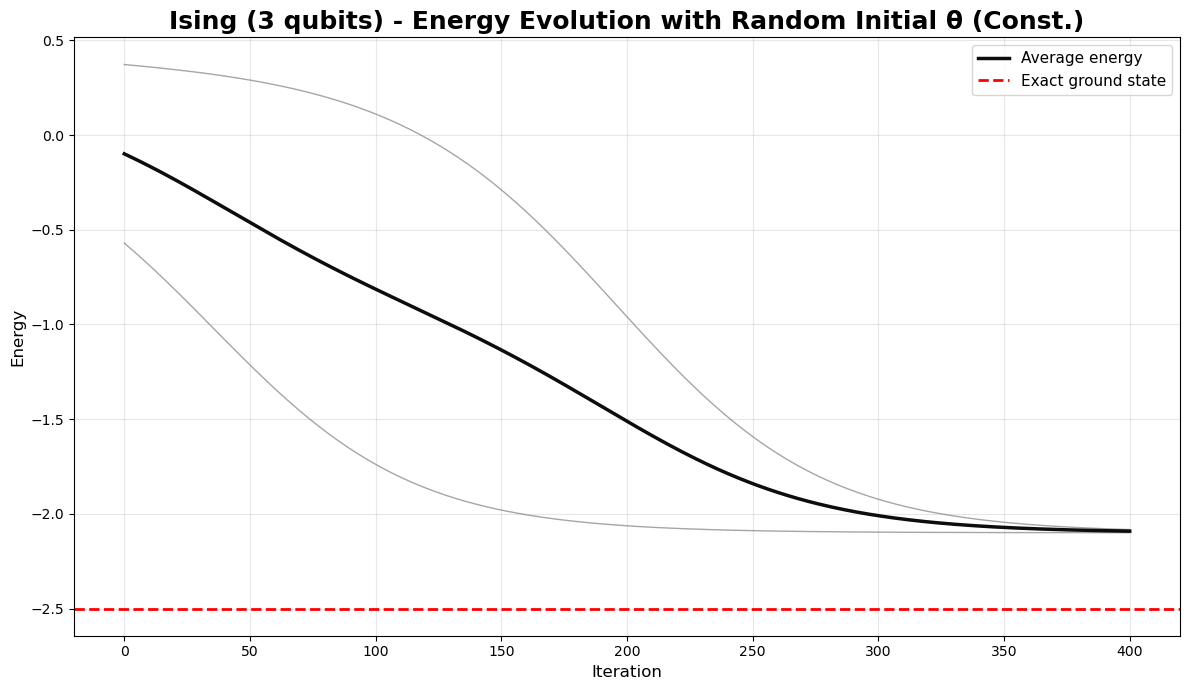

In [7]:


print("\n" + "=" * 80)
print("SECTION X: Ising (3 qubits) – RANDOM INITIAL THETA VALUES (Const.)")
print("=" * 80)

# ----------------------------------------------------------------------
# 3-qubit Ising model
# ----------------------------------------------------------------------
J = np.array([
    [0.0,  1.0,  0.5],
    [1.0,  0.0,  0.8],
    [0.5,  0.8,  0.0],
], dtype=float)

h = np.array([0.3, -0.2, 0.1], dtype=float)

opti_reps = 0
n_qubits = J.shape[0]
n_params = (opti_reps + 1) * n_qubits   # RealAmplitudes params

# ----------------------------------------------------------------------
# Compute exact ground-state energy for reference
# ----------------------------------------------------------------------

E_min_exact = -2.5
print(f"Exact ground-state energy: {E_min_exact:.6f}")

# ----------------------------------------------------------------------
# Run many VQE runs with random initial parameters
# ----------------------------------------------------------------------
k = 2  # number of random initial θ values (adjust as you like)

results = []

for idx in range(k):
    theta0 = np.random.uniform(0, 2*np.pi, n_params)
    print(f"  -> random initial θ ({idx+1}/{k})")

    vqe = VQE_Ising_PSR_const(
        max_iter=400,
        learning_rate=0.01,
        store_history=True,
        reps=opti_reps,
        J=J,
        h=h
    )

    theta_opt, E_opt = vqe.run(initial_params=theta0)

    results.append({
        "theta0": theta0,
        "theta_opt": theta_opt,
        "energy": E_opt,
        "history": vqe.history_energy,
    })

    print(f"     Final Energy: {E_opt:.6f}")

# ----------------------------------------------------------------------
# Plot: all runs (gray), mean (black), exact ground state (red dashed)
# ----------------------------------------------------------------------
plt.figure(figsize=(12, 7))
plt.title("Ising (3 qubits) - Energy Evolution with Random Initial θ (Const.)",
          fontsize=18, fontweight='bold')

# collect histories
histories = [np.array(r["history"]) for r in results]

# pad and compute mean across runs
max_len = max(len(hh) for hh in histories)
padded = np.array([
    np.pad(hh, (0, max_len - len(hh)), constant_values=np.nan)
    for hh in histories
])
mean_history = np.nanmean(padded, axis=0)

# individual trajectories: thin gray
for hh in histories:
    plt.plot(hh, color='gray', linewidth=1.0, alpha=0.7)

# mean curve: thick black
plt.plot(mean_history,
         color='black',
         linewidth=2.5,
         alpha=0.95,
         label='Average energy')

# exact ground state: red dashed
plt.axhline(
    E_min_exact,
    color='red',
    linestyle='--',
    linewidth=2,
    label='Exact ground state'
)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


### Optimizers (Gradient Descent vs Adam vs QNG)

Exact ground-state energy: -2.500000

------------------------------------------------------------
 Running optimizer: Const.
------------------------------------------------------------
  -> run 1/2
Iteration 0/400 (0.0%)
Iteration 10/400 (2.5%)
Iteration 20/400 (5.0%)
Iteration 30/400 (7.5%)
Iteration 40/400 (10.0%)
Iteration 50/400 (12.5%)
Iteration 60/400 (15.0%)
Iteration 70/400 (17.5%)
Iteration 80/400 (20.0%)
Iteration 90/400 (22.5%)
Iteration 100/400 (25.0%)
Iteration 110/400 (27.5%)
Iteration 120/400 (30.0%)
Iteration 130/400 (32.5%)
Iteration 140/400 (35.0%)
Iteration 150/400 (37.5%)
Iteration 160/400 (40.0%)
Iteration 170/400 (42.5%)
Iteration 180/400 (45.0%)
Iteration 190/400 (47.5%)
Iteration 200/400 (50.0%)
Iteration 210/400 (52.5%)
Iteration 220/400 (55.0%)
Iteration 230/400 (57.5%)
Iteration 240/400 (60.0%)
Iteration 250/400 (62.5%)
Iteration 260/400 (65.0%)
Iteration 270/400 (67.5%)
Iteration 280/400 (70.0%)
Iteration 290/400 (72.5%)
Iteration 300/400 (75.0%)
Iteration

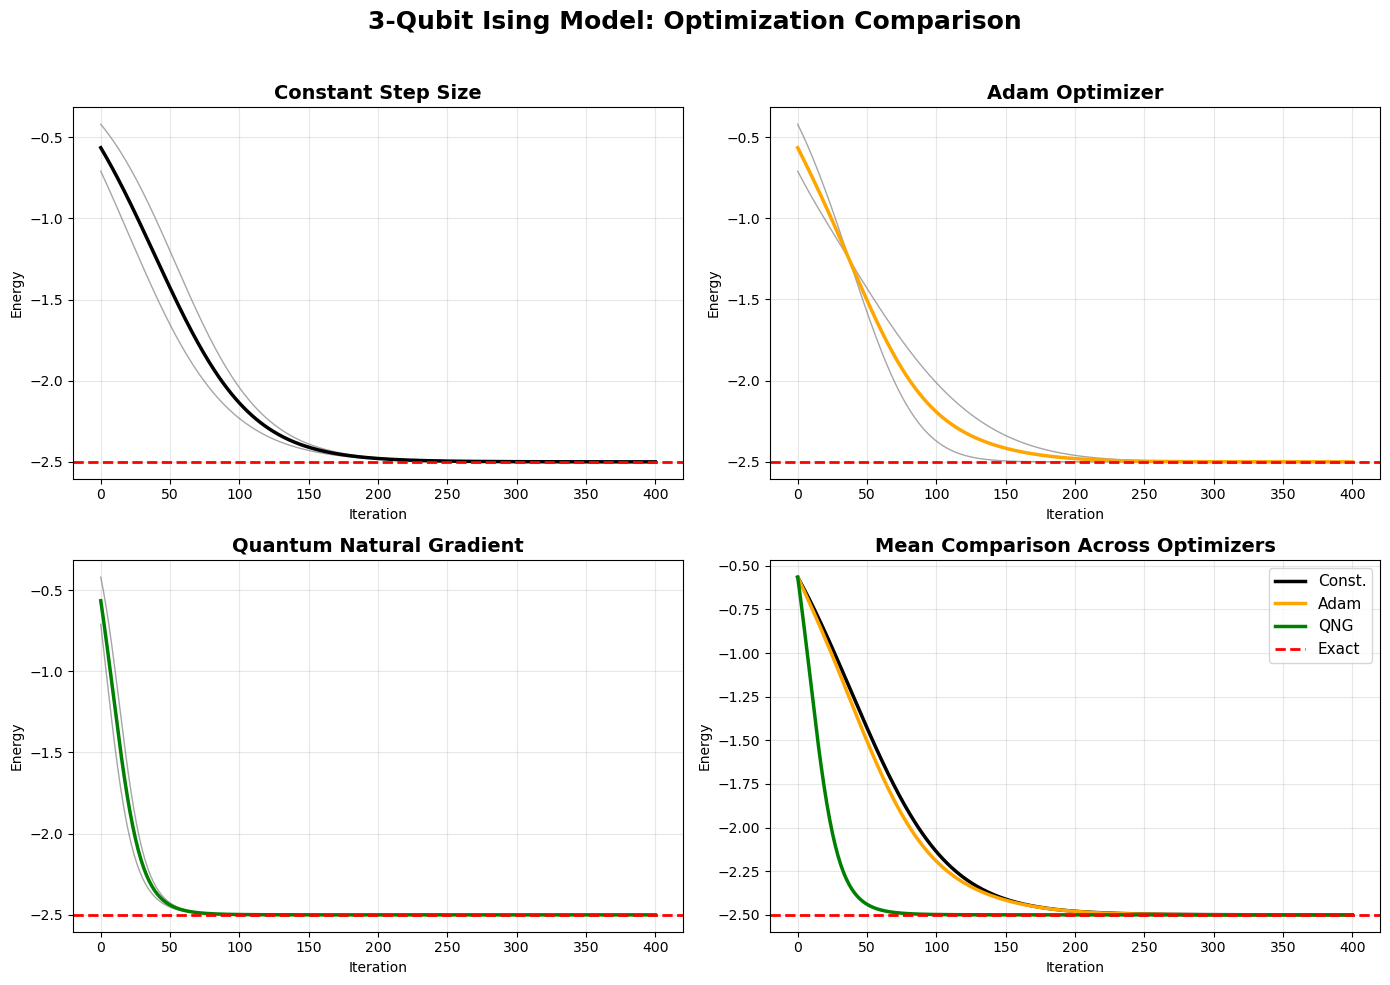

In [11]:

# ============================================================
# 3-QUBIT ISING MODEL + EXACT GROUND STATE
# ============================================================

J = np.array([
    [0.0,  1.0,  0.5],
    [1.0,  0.0,  0.8],
    [0.5,  0.8,  0.0],
], dtype=float)

h = np.array([0.3, -0.2, 0.1], dtype=float)

opti_reps = 0                     # reps for RealAmplitudes
n_qubits = J.shape[0]
n_params = (opti_reps + 1) * n_qubits


E_min_exact = -2.5
print(f"Exact ground-state energy: {E_min_exact:.6f}")

# ============================================================
# RUN MANY RANDOM INITIALIZATIONS FOR EACH OPTIMIZER
# ============================================================

k = 2   # number of random initial thetas per optimizer

# Use same random initial thetas for all optimizers (fair comparison)
initial_thetas = [np.random.uniform(0, 2*np.pi, n_params) for _ in range(k)]

optimizers_single_classes = {
    'Const.': lambda: VQE_Ising_PSR_const(
        max_iter=400,
        eps_energy=0,
        learning_rate=0.01,
        store_history=True,
        reps=opti_reps,
        J=J,
        h=h
    ),
    'Adam': lambda: VQE_Ising_PSR_Adam(
        max_iter=400,
        eps_energy=0,
        learning_rate=0.01,
        store_history=True,
        reps=opti_reps,
        J=J,
        h=h
    ),
    'QNG': lambda: VQE_Ising_QNG(
        max_iter=400,
        eps_energy=0,
        learning_rate=0.01,
        decay=0.01,
        store_history=True,
        reps=opti_reps,
        J=J,
        h=h
    ),
}

all_results = {}

for opti_name, opti_constructor in optimizers_single_classes.items():
    print(f"\n{'-'*60}")
    print(f" Running optimizer: {opti_name}")
    print("-"*60)

    runs = []

    for idx, theta0 in enumerate(initial_thetas):
        print(f"  -> run {idx+1}/{k}")
        opti = opti_constructor()
        theta_opt, E_opt = opti.run(initial_params=theta0)

        runs.append({
            "theta0": theta0,
            "theta_opt": theta_opt,
            "energy": E_opt,
            "history": opti.history_energy,
        })

        print(f"     Final Energy: {E_opt:.6f}")

    all_results[opti_name] = runs

# ============================================================
# PLOT: 2×2 SUBPLOT LAYOUT
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("3-Qubit Ising Model: Optimization Comparison",
             fontsize=18, fontweight='bold')

subplot_titles = {
    'Const.': "Constant Step Size",
    'Adam': "Adam Optimizer",
    'QNG': "Quantum Natural Gradient"
}

colors = {
    'Const.': 'black',
    'Adam': 'orange',
    'QNG': 'green'
}

def compute_mean_curve(histories):
    max_len = max(len(h) for h in histories)
    padded = np.array([
        np.pad(np.array(h), (0, max_len - len(h)), constant_values=np.nan)
        for h in histories
    ])
    return np.nanmean(padded, axis=0)

mean_curves = {}

# --- first 3 subplots: spaghetti + mean for each optimizer ---
optimizer_order = ['Const.', 'Adam', 'QNG']

for ax, opti_name in zip(axes.flat[:3], optimizer_order):
    results = all_results[opti_name]
    histories = [r["history"] for r in results]
    mean_curve = compute_mean_curve(histories)
    mean_curves[opti_name] = mean_curve

    # gray trajectories
    for hist in histories:
        ax.plot(hist, color='gray', linewidth=1.0, alpha=0.7)

    # colored mean curve
    ax.plot(mean_curve,
            color=colors[opti_name],
            linewidth=2.5,
            label=f"mean ({opti_name})")

    # exact ground state
    ax.axhline(E_min_exact,
               color='red',
               linestyle='--',
               linewidth=2)

    ax.set_title(subplot_titles[opti_name],
                 fontsize=14, fontweight='bold')
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Energy")
    ax.grid(True, alpha=0.3)

# --- 4th subplot: mean comparison only ---
ax = axes[1, 1]
ax.set_title("Mean Comparison Across Optimizers",
             fontsize=14, fontweight='bold')

for opti_name in optimizer_order:
    curve = mean_curves[opti_name]
    ax.plot(curve,
            linewidth=2.5,
            color=colors[opti_name],
            label=opti_name)

ax.axhline(E_min_exact,
           color='red',
           linestyle='--',
           linewidth=2,
           label="Exact")

ax.set_xlabel("Iteration")
ax.set_ylabel("Energy")
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



--- Run comparison on Ising model ---

Standard Gradient (PSR + Adam):
Iteration 0/200 (0.0%)
Iteration 10/200 (5.0%)
Iteration 20/200 (10.0%)
Iteration 30/200 (15.0%)
Iteration 40/200 (20.0%)
Iteration 50/200 (25.0%)
Iteration 60/200 (30.0%)
Iteration 70/200 (35.0%)
Iteration 80/200 (40.0%)
Iteration 90/200 (45.0%)
Iteration 100/200 (50.0%)
Iteration 110/200 (55.0%)
Iteration 120/200 (60.0%)
Iteration 130/200 (65.0%)
Iteration 140/200 (70.0%)
Iteration 150/200 (75.0%)
Iteration 160/200 (80.0%)
Iteration 170/200 (85.0%)
Iteration 180/200 (90.0%)
Converged at iteration 187
  Final Energy: -2.499980

Quantum Natural Gradient:
Iteration 0/200 (0.0%)
Iteration 10/200 (5.0%)
Iteration 20/200 (10.0%)
Iteration 30/200 (15.0%)
Iteration 40/200 (20.0%)
Iteration 50/200 (25.0%)
Iteration 60/200 (30.0%)
Iteration 70/200 (35.0%)
Converged at iteration 73
  Final Energy: -2.499980

 Saved: results/12-5-Simeon/qng_vs_standard.png


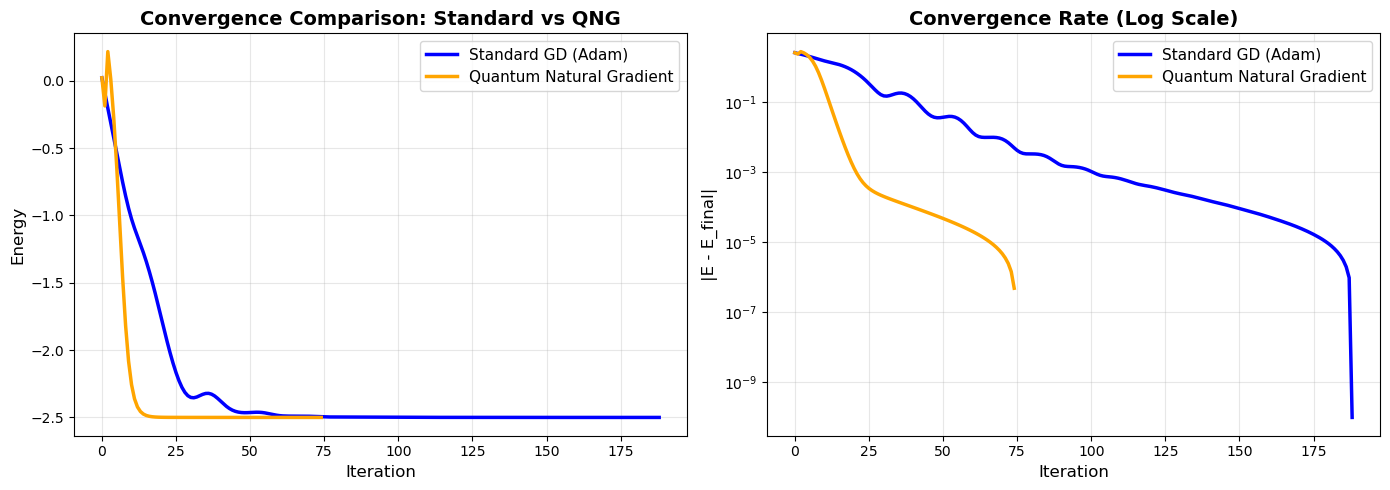

In [13]:
print("\n--- Run comparison on Ising model ---\n")

# Standard gradient
vqe_standard = VQE_Ising_PSR_Adam(
    max_iter=200,
    learning_rate=0.05,
    store_history=True,
    reps=2,
    J=J,
    h=h
)

n_params = (vqe_standard.reps + 1) * 3
np.random.seed(42)
theta_init = np.random.uniform(0, 2*np.pi, n_params)

print("Standard Gradient (PSR + Adam):")
theta_std, E_std = vqe_standard.run(initial_params=theta_init.copy())
print(f"  Final Energy: {E_std:.6f}\n")

# Quantum Natural Gradient
vqe_qng = VQE_Ising_QNG(
    max_iter=200,
    learning_rate=0.05,
    decay=0.01,
    store_history=True,
    reps=2,
    J=J,
    h=h
)

print("Quantum Natural Gradient:")
theta_qng, E_qng = vqe_qng.run(initial_params=theta_init.copy())
print(f"  Final Energy: {E_qng:.6f}\n")


# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Energy evolution
ax1 = axes[0]
ax1.plot(vqe_standard.history_energy, label='Standard GD (Adam)', 
         linewidth=2.5, color='blue')
ax1.plot(vqe_qng.history_energy, label='Quantum Natural Gradient', 
         linewidth=2.5, color='orange')
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Energy', fontsize=12)
ax1.set_title('Convergence Comparison: Standard vs QNG', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Convergence rate (log scale)
ax2 = axes[1]
# Compute distance from final energy
baseline = min(E_std, E_qng)
error_std = np.abs(np.array(vqe_standard.history_energy) - baseline)
error_qng = np.abs(np.array(vqe_qng.history_energy) - baseline)

# Avoid log(0)
error_std = np.maximum(error_std, 1e-10)
error_qng = np.maximum(error_qng, 1e-10)

ax2.semilogy(error_std, label='Standard GD (Adam)', linewidth=2.5, color='blue')
ax2.semilogy(error_qng, label='Quantum Natural Gradient', linewidth=2.5, color='orange')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('|E - E_final|', fontsize=12)
ax2.set_title('Convergence Rate (Log Scale)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'qng_vs_standard.png', dpi=300, bbox_inches='tight')
print(f" Saved: {RESULTS_DIR / 'qng_vs_standard.png'}")
plt.show()

### Gradients (fintite diff. vs SPSA vs PSA)

Coupling matrix J:
[[0.  1.  0.5]
 [1.  0.  0.8]
 [0.5 0.8 0. ]]

External field h:
[ 0.3 -0.2  0.1]

--- Run Ising Model VQE ---


Optimizer: finit diff.
Iteration 0/200 (0.0%)
Iteration 10/200 (5.0%)
Iteration 20/200 (10.0%)
Iteration 30/200 (15.0%)
Iteration 40/200 (20.0%)
Iteration 50/200 (25.0%)
Iteration 60/200 (30.0%)
Iteration 70/200 (35.0%)
Iteration 80/200 (40.0%)
Iteration 90/200 (45.0%)
Iteration 100/200 (50.0%)
Iteration 110/200 (55.0%)
Iteration 120/200 (60.0%)
Iteration 130/200 (65.0%)
Iteration 140/200 (70.0%)
Iteration 150/200 (75.0%)
Iteration 160/200 (80.0%)
Iteration 170/200 (85.0%)
Iteration 180/200 (90.0%)
Iteration 190/200 (95.0%)
Converged at iteration 191
  Final Energy: -2.499976

Optimizer: SPSA
Iteration 0/200 (0.0%)
Iteration 10/200 (5.0%)
Iteration 20/200 (10.0%)
Iteration 30/200 (15.0%)
Iteration 40/200 (20.0%)
Iteration 50/200 (25.0%)
Iteration 60/200 (30.0%)
Iteration 70/200 (35.0%)
Converged at iteration 74
  Final Energy: -2.475133

Optimizer: PSR
Ite

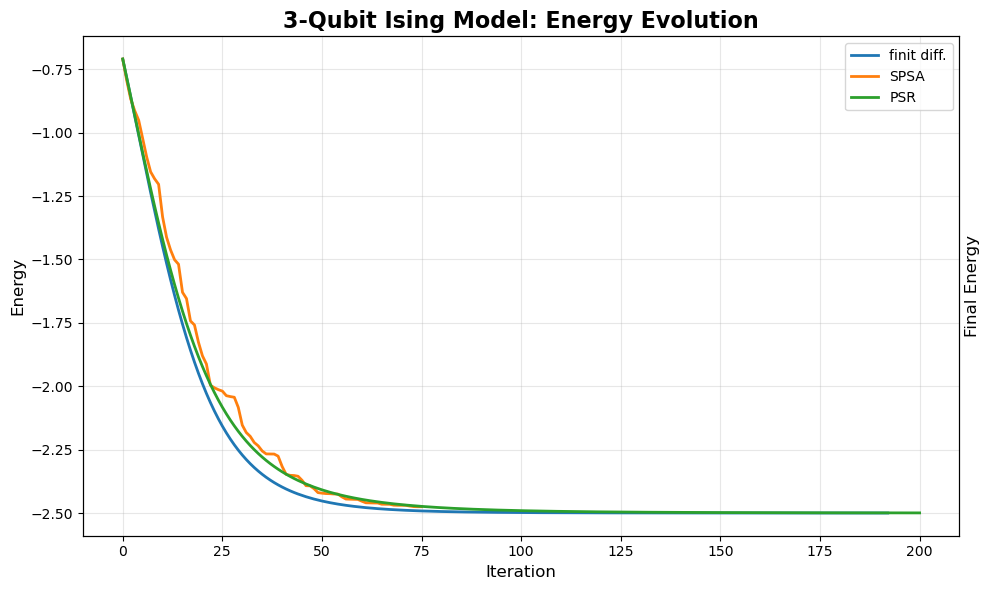

In [14]:

# -------------------------------------------------------------
# 1) Define 3-qubit Ising model
# -------------------------------------------------------------
J = np.array([
    [0.0,  1.0,  0.5],
    [1.0,  0.0,  0.8],
    [0.5,  0.8,  0.0],
], dtype=float)

h = np.array([0.3, -0.2, 0.1], dtype=float)

print("Coupling matrix J:")
print(J)
print("\nExternal field h:")
print(h)

# reps used in your Ising ansatz
opti_reps = 0

# number of parameters for the ansatz
n_qubits = J.shape[0]
n_params = (opti_reps + 1) * n_qubits

# common random initial parameters for all optimizers
theta_init = np.random.uniform(0, 2*np.pi, n_params)

print("\n--- Run Ising Model VQE ---\n")

# -------------------------------------------------------------
# 2) Build optimizer instances
# -------------------------------------------------------------
optimizers_ising = {
    'finit diff.': VQE_Ising_QNG_finit(
        max_iter=200,
        learning_rate=0.01,
        store_history=True,
        reps=opti_reps,
        J=J,
        h=h
    ),
    'SPSA': VQE_Ising_QNG_spsa(
        max_iter=200,
        learning_rate=0.01,
        gradient_eps=0.1,
        store_history=True,
        reps=opti_reps,
        J=J,
        h=h
    ),
    'PSR': VQE_Ising_QNG_psr(
        max_iter=200,
        learning_rate=0.01,
        decay=0.02,
        store_history=True,
        reps=opti_reps,
        J=J,
        h=h
    )
}

# -------------------------------------------------------------
# 3) Run each optimizer and store histories
# -------------------------------------------------------------
results_ising = {}

for name, optimizer in optimizers_ising.items():
    print(f"\nOptimizer: {name}")
    theta_opt, E_opt = optimizer.run(initial_params=theta_init)

    results_ising[name] = {
        'theta': theta_opt,
        'energy': E_opt,
        'history': optimizer.history_energy
    }

    print(f"  Final Energy: {E_opt:.6f}")

# -------------------------------------------------------------
# 4) Plot energy evolution (the figure you showed)
# -------------------------------------------------------------
plt.figure(figsize=(10, 6))
ax1 = plt.gca()

# plot histories
for name, result in results_ising.items():
    ax1.plot(result['history'], label=name, linewidth=2)

ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Energy', fontsize=12)
ax1.set_title('3-Qubit Ising Model: Energy Evolution',
              fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)

# legend in upper right
ax1.legend(fontsize=10, loc='upper right')

# right y-axis with label "Final Energy" (no extra data)
ax2 = ax1.twinx()
ax2.set_ylabel('Final Energy', fontsize=12)
ax2.set_yticks([])  # hide right ticks

plt.tight_layout()
plt.show()


### step size/learing rate


--- Testing learning rates ---
Progress: 1/2 (lr=0.0032)
Iteration 0/200 (0.0%)
Iteration 10/200 (5.0%)
Iteration 20/200 (10.0%)
Iteration 30/200 (15.0%)
Iteration 40/200 (20.0%)
Iteration 50/200 (25.0%)
Iteration 60/200 (30.0%)
Iteration 70/200 (35.0%)
Iteration 80/200 (40.0%)
Iteration 90/200 (45.0%)
Iteration 100/200 (50.0%)
Iteration 110/200 (55.0%)
Iteration 120/200 (60.0%)
Iteration 130/200 (65.0%)
Iteration 140/200 (70.0%)
Iteration 150/200 (75.0%)
Iteration 160/200 (80.0%)
Iteration 170/200 (85.0%)
Iteration 180/200 (90.0%)
Iteration 190/200 (95.0%)
Progress: 2/2 (lr=0.3162)
Iteration 0/200 (0.0%)
Iteration 10/200 (5.0%)
Iteration 20/200 (10.0%)
Converged at iteration 23


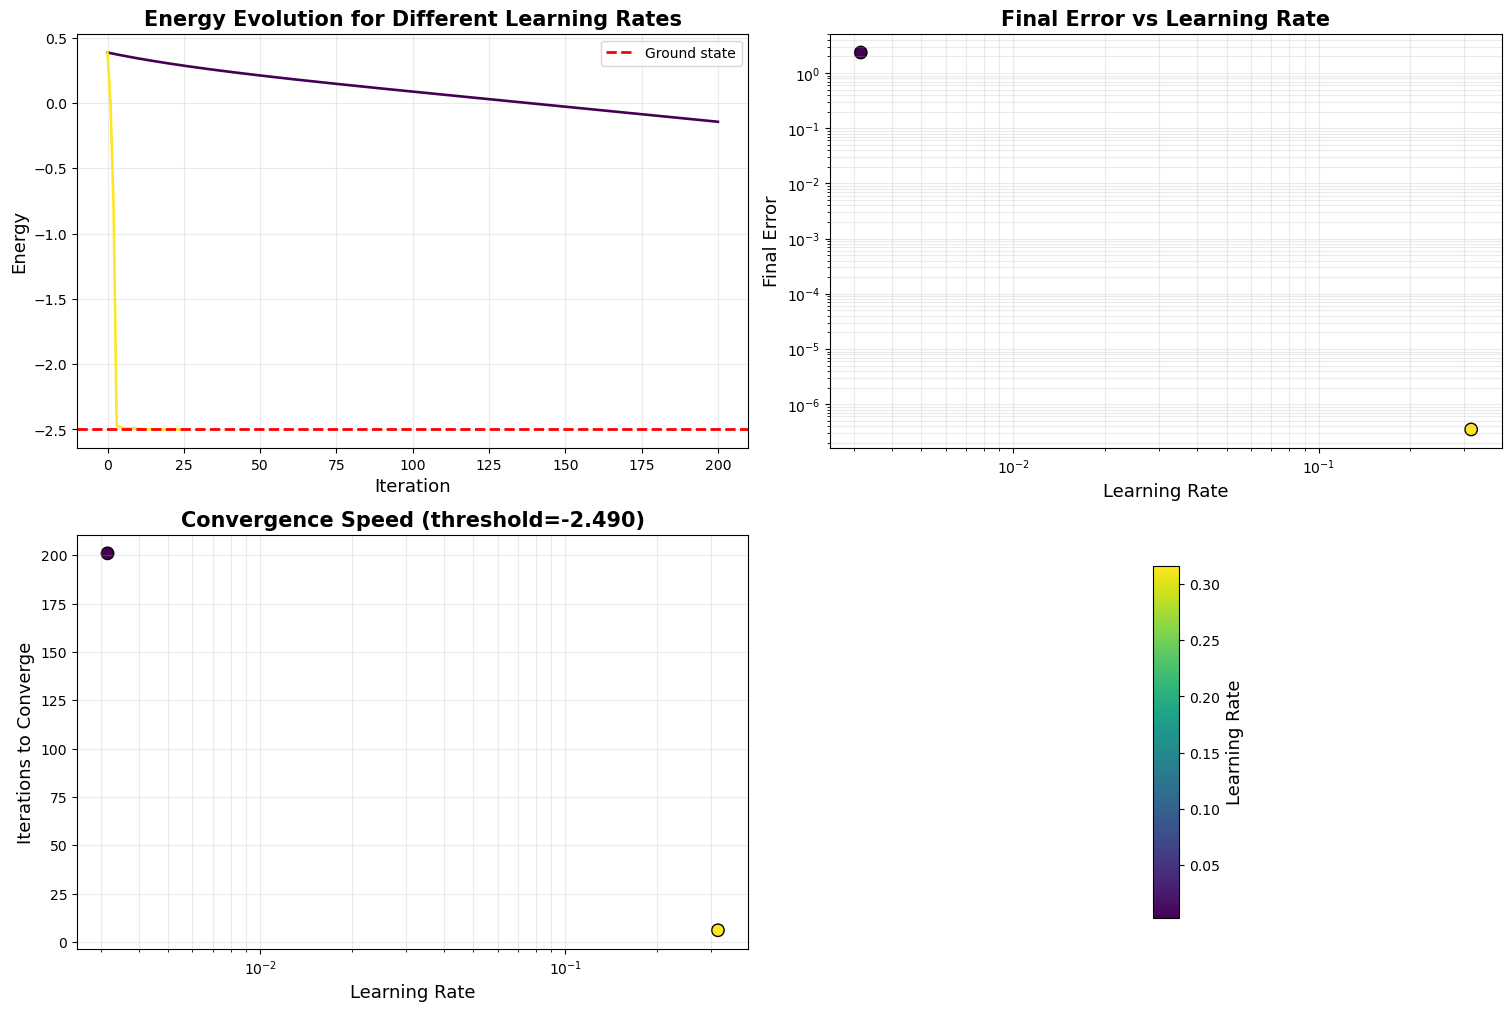

In [7]:
# import numpy as np
# import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# # ============================================================
# 1) 3-qubit Ising model (same as in your other experiments)
# ============================================================
J = np.array([
    [0.0,  1.0,  0.5],
    [1.0,  0.0,  0.8],
    [0.5,  0.8,  0.0],
], dtype=float)

h = np.array([0.3, -0.2, 0.1], dtype=float)

opti_reps = 0
n_qubits = J.shape[0]
n_params = (opti_reps + 1) * n_qubits

# ground-state energy you used in the plot
E_ground = -2.5               # reference value
threshold_E = -2.490          # for "convergence speed" panel

# ============================================================
# 2) Sweep over learning rates
# ============================================================
learning_rates = np.logspace(-2.5, -0.5, 2)  # ≈ 0.003 ... 0.3
results_lr = []

# same initial parameters for all learning rates
initial_params = np.random.uniform(0, 2*np.pi, n_params)

print("\n--- Testing learning rates ---")
for i, lr in enumerate(learning_rates):
    print(f"Progress: {i+1}/{len(learning_rates)} (lr={lr:.4f})")

    vqe = VQE_Ising_QNG_psr(
        max_iter=200,
        learning_rate=lr,
        decay=0.02,
        store_history=True,
        reps=opti_reps,
        J=J,
        h=h
    )

    theta_opt, E_opt = vqe.run(initial_params)

    results_lr.append({
        "lr": lr,
        "energy": E_opt,
        "error": abs(E_opt - E_ground),
        "history": vqe.history_energy,
    })

# ============================================================
# 3) Prepare data for plotting
# ============================================================
histories = [np.array(r["history"]) for r in results_lr]
final_errors = np.array([r["error"] for r in results_lr])

# iterations until first time E <= threshold_E
convergence_iters = []
for hist in histories:
    iters = np.where(np.array(hist) <= threshold_E)[0]
    if len(iters) == 0:
        convergence_iters.append(len(hist))
    else:
        convergence_iters.append(iters[0])

convergence_iters = np.array(convergence_iters)

# colormap based on learning rate
norm = Normalize(vmin=learning_rates.min(), vmax=learning_rates.max())
cmap = plt.cm.viridis
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

# ============================================================
# 4) Plot – 2×2 layout, colorbar in bottom-right panel
# ============================================================

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, axes = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

ax_traj = axes[0, 0]   # top-left
ax_err  = axes[0, 1]   # top-right
ax_conv = axes[1, 0]   # bottom-left
ax_cb   = axes[1, 1]   # bottom-right → will hold the colorbar

# ---------------- (a) Energy evolution panel -----------------
for lr, r in zip(learning_rates, results_lr):
    ax_traj.plot(r["history"], color=cmap(norm(lr)), linewidth=1.9)

ax_traj.axhline(E_ground, color="red", ls="--", lw=2, label="Ground state")
ax_traj.set_title("Energy Evolution for Different Learning Rates",
                  fontsize=15, fontweight="bold")
ax_traj.set_xlabel("Iteration", fontsize=13)
ax_traj.set_ylabel("Energy", fontsize=13)
ax_traj.legend(fontsize=10)
ax_traj.grid(True, alpha=0.25)

# ---------------- (b) Final Error vs LR ----------------------
ax_err.scatter(learning_rates, final_errors,
               c=learning_rates, cmap=cmap,
               edgecolor="k", s=80)
ax_err.set_xscale("log")
ax_err.set_yscale("log")
ax_err.set_title("Final Error vs Learning Rate",
                 fontsize=15, fontweight="bold")
ax_err.set_xlabel("Learning Rate", fontsize=13)
ax_err.set_ylabel("Final Error", fontsize=13)
ax_err.grid(True, which="both", alpha=0.25)

# ---------------- (c) Convergence speed ----------------------
ax_conv.scatter(learning_rates, convergence_iters,
                c=learning_rates, cmap=cmap,
                edgecolor="k", s=80)
ax_conv.set_xscale("log")
ax_conv.set_title(f"Convergence Speed (threshold={threshold_E:.3f})",
                  fontsize=15, fontweight="bold")
ax_conv.set_xlabel("Learning Rate", fontsize=13)
ax_conv.set_ylabel("Iterations to Converge", fontsize=13)
ax_conv.grid(True, which="both", alpha=0.25)

# ---------------- (d) Colorbar in bottom-right panel ---------
# Use the bottom-right axes only as a container for an inset colorbar
ax_cb.set_xticks([])
ax_cb.set_yticks([])
for spine in ax_cb.spines.values():
    spine.set_visible(False)

# Make a colorbar that sits nicely inside this panel
cax = inset_axes(ax_cb,
                 width="4%",   # % of the parent axes width
                 height="85%",  # % of the parent axes height
                 loc="center")

cb = fig.colorbar(sm, cax=cax)
cb.set_label("Learning Rate", fontsize=13)

plt.show()



# Hydrogen Molecule ($H_2$)

### Reel Ansatz


H₂ VQE with RealAmplitudes ansatz at distance d = 0.70 Å

--- reps = 0 ---
Iteration 0/150 (0.0%)
Iteration 10/150 (6.7%)
Iteration 20/150 (13.3%)
Iteration 30/150 (20.0%)
Iteration 40/150 (26.7%)
Iteration 50/150 (33.3%)
Iteration 60/150 (40.0%)
Iteration 70/150 (46.7%)
Iteration 80/150 (53.3%)
Iteration 90/150 (60.0%)
Iteration 100/150 (66.7%)
Iteration 110/150 (73.3%)
Iteration 120/150 (80.0%)
Iteration 130/150 (86.7%)
Iteration 140/150 (93.3%)
  Final energy: -1.117271 Ha   (4 parameters)

--- reps = 1 ---
Iteration 0/150 (0.0%)
Iteration 10/150 (6.7%)
Iteration 20/150 (13.3%)
Iteration 30/150 (20.0%)
Iteration 40/150 (26.7%)
Iteration 50/150 (33.3%)
Iteration 60/150 (40.0%)
Iteration 70/150 (46.7%)
Iteration 80/150 (53.3%)
Iteration 90/150 (60.0%)
Iteration 100/150 (66.7%)
Iteration 110/150 (73.3%)
Iteration 120/150 (80.0%)
Iteration 130/150 (86.7%)
Iteration 140/150 (93.3%)
  Final energy: -1.100118 Ha   (8 parameters)


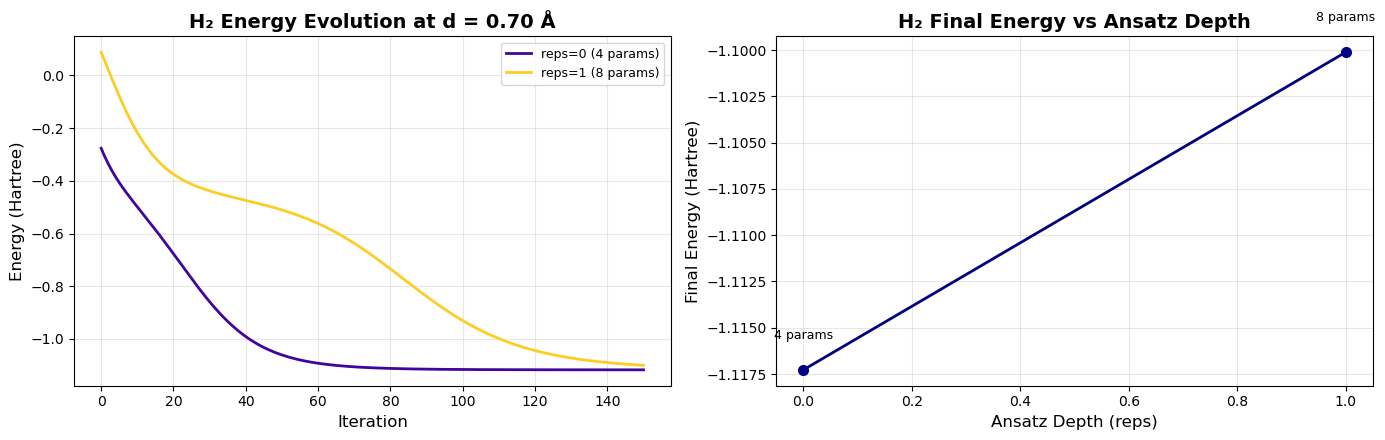

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# H2: Energy vs Ansatz Depth (RealAmplitudes)
# ============================================================

distance = 0.70  # Å
reps_list = [0, 1]   # ansatz depth
num_qubits = 4                # H2 in sto-3g → 4 qubits

histories = {}
final_energies = {}

print("\n" + "=" * 70)
print(f"H₂ VQE with RealAmplitudes ansatz at distance d = {distance:.2f} Å")
print("=" * 70)

for reps in reps_list:
    print(f"\n--- reps = {reps} ---")

    # build VQE instance (RealAmplitudesAnsatz is mixed into VQE_H2_QNG)
    vqe_h2 = VQE_H2_QNG(
        max_iter=150,
        learning_rate=0.05,
        decay=0.01,
        store_history=True,
        reps=reps,
        distance=distance
    )

    # number of parameters for RealAmplitudes: (reps+1) * num_qubits
    n_params = (reps + 1) * num_qubits

    # deterministic initial parameters (same pattern you used before)
    theta_init = np.zeros(n_params)
    for i in range(n_params):
        theta_init[i] = np.pi * i / n_params

    theta_opt, E_opt = vqe_h2.run(initial_params=theta_init)

    histories[reps] = vqe_h2.history_energy
    final_energies[reps] = E_opt

    print(f"  Final energy: {E_opt:.6f} Ha   ({n_params} parameters)")


# ============================================================
# PLOTTING
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 4.5))
ax1, ax2 = axes

# ---------- Left: energy evolution for different reps ----------
colors = plt.cm.plasma(np.linspace(0.1, 0.9, len(reps_list)))

for reps, color in zip(reps_list, colors):
    history = histories[reps]
    n_params = (reps + 1) * num_qubits
    ax1.plot(
        history,
        color=color,
        linewidth=2.0,
        label=f"reps={reps} ({n_params} params)"
    )

ax1.set_title(f"H₂ Energy Evolution at d = {distance:.2f} Å",
              fontsize=14, fontweight="bold")
ax1.set_xlabel("Iteration", fontsize=12)
ax1.set_ylabel("Energy (Hartree)", fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=9)

# ---------- Right: final energy vs ansatz depth ----------
reps_array = np.array(reps_list, dtype=float)
energies_array = np.array([final_energies[r] for r in reps_list])

ax2.plot(reps_array,
         energies_array,
         marker="o",
         markersize=7,
         linewidth=2.0,
         color="navy")

for r, E in zip(reps_array, energies_array):
    n_params = (int(r) + 1) * num_qubits
    ax2.text(r,
             E + 0.0015,
             f"{n_params} params",
             ha="center",
             va="bottom",
             fontsize=9)

ax2.set_title("H₂ Final Energy vs Ansatz Depth",
              fontsize=14, fontweight="bold")
ax2.set_xlabel("Ansatz Depth (reps)", fontsize=12)
ax2.set_ylabel("Final Energy (Hartree)", fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### complex ansatz


H₂ VQE with RealAmplitudes ansatz at distance d = 0.70 Å

--- reps = 0 ---
Iteration 0/150 (0.0%)
Iteration 10/150 (6.7%)
Iteration 20/150 (13.3%)
Iteration 30/150 (20.0%)
Iteration 40/150 (26.7%)
Iteration 50/150 (33.3%)
Iteration 60/150 (40.0%)
Iteration 70/150 (46.7%)
Iteration 80/150 (53.3%)
Iteration 90/150 (60.0%)
Converged at iteration 90
  Final energy: -1.115640 Ha   (8 parameters)

--- reps = 1 ---
Iteration 0/150 (0.0%)
Iteration 10/150 (6.7%)
Iteration 20/150 (13.3%)
Iteration 30/150 (20.0%)
Iteration 40/150 (26.7%)
Iteration 50/150 (33.3%)
Iteration 60/150 (40.0%)
Iteration 70/150 (46.7%)
Iteration 80/150 (53.3%)
Iteration 90/150 (60.0%)
Iteration 100/150 (66.7%)
Iteration 110/150 (73.3%)
Iteration 120/150 (80.0%)
Iteration 130/150 (86.7%)
Iteration 140/150 (93.3%)
  Final energy: -0.049667 Ha   (16 parameters)


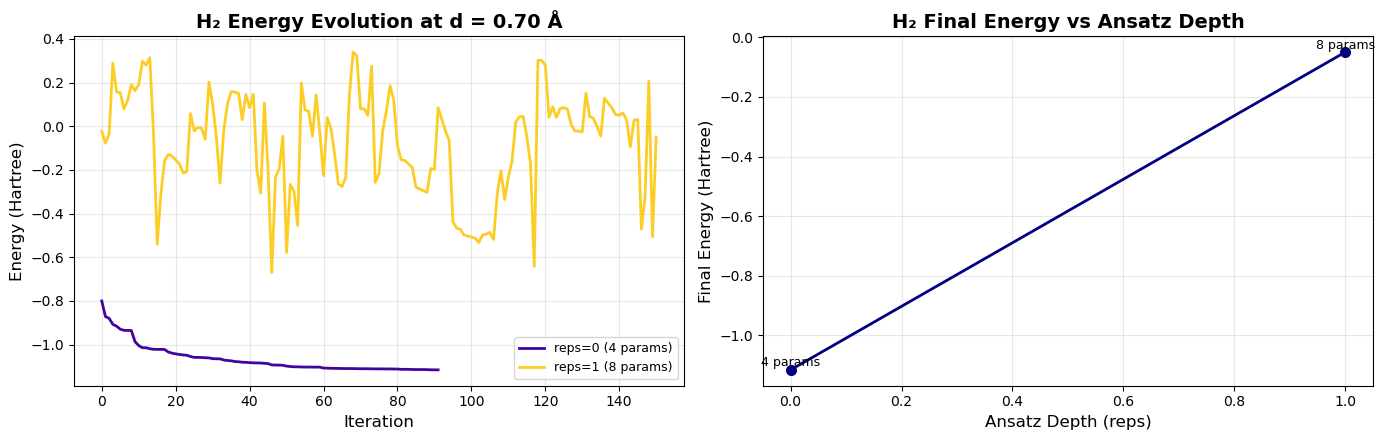

In [28]:


# ============================================================
# H2: Energy vs Ansatz Depth (RealAmplitudes)
# ============================================================

distance = 0.70  # Å
reps_list = [0, 1]   # ansatz depth
num_qubits = 4                # H2 in sto-3g → 4 qubits

histories = {}
final_energies = {}

print("\n" + "=" * 70)
print(f"H₂ VQE with RealAmplitudes ansatz at distance d = {distance:.2f} Å")
print("=" * 70)

for reps in reps_list:
    print(f"\n--- reps = {reps} ---")

    # build VQE instance (RealAmplitudesAnsatz is mixed into VQE_H2_QNG)
    vqe_h2 = VQE_H2_QNG_comp(
        max_iter=150,
        learning_rate=0.05,
        decay=0.01,
        store_history=True,
        reps=reps,
        distance=distance
    )

    # number of parameters for RealAmplitudes: (reps+1) * num_qubits
    n_params = (reps + 1) * num_qubits*2

    # deterministic initial parameters (same pattern you used before)
    theta_init = np.zeros(n_params)
    for i in range(n_params):
        theta_init[i] = np.pi * i / n_params

    theta_opt, E_opt = vqe_h2.run(initial_params=theta_init)

    histories[reps] = vqe_h2.history_energy
    final_energies[reps] = E_opt

    print(f"  Final energy: {E_opt:.6f} Ha   ({n_params} parameters)")


# ============================================================
# PLOTTING
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 4.5))
ax1, ax2 = axes

# ---------- Left: energy evolution for different reps ----------
colors = plt.cm.plasma(np.linspace(0.1, 0.9, len(reps_list)))

for reps, color in zip(reps_list, colors):
    history = histories[reps]
    n_params = (reps + 1) * num_qubits
    ax1.plot(
        history,
        color=color,
        linewidth=2.0,
        label=f"reps={reps} ({n_params} params)"
    )

ax1.set_title(f"H₂ Energy Evolution at d = {distance:.2f} Å",
              fontsize=14, fontweight="bold")
ax1.set_xlabel("Iteration", fontsize=12)
ax1.set_ylabel("Energy (Hartree)", fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=9)

# ---------- Right: final energy vs ansatz depth ----------
reps_array = np.array(reps_list, dtype=float)
energies_array = np.array([final_energies[r] for r in reps_list])

ax2.plot(reps_array,
         energies_array,
         marker="o",
         markersize=7,
         linewidth=2.0,
         color="navy")

for r, E in zip(reps_array, energies_array):
    n_params = (int(r) + 1) * num_qubits
    ax2.text(r,
             E + 0.0015,
             f"{n_params} params",
             ha="center",
             va="bottom",
             fontsize=9)

ax2.set_title("H₂ Final Energy vs Ansatz Depth",
              fontsize=14, fontweight="bold")
ax2.set_xlabel("Ansatz Depth (reps)", fontsize=12)
ax2.set_ylabel("Final Energy (Hartree)", fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



--- Compute H2 Potential Energy Curve ---

Distance 1/3: 0.30 Å
Iteration 0/150 (0.0%)
Iteration 10/150 (6.7%)
Iteration 20/150 (13.3%)
Iteration 30/150 (20.0%)
Iteration 40/150 (26.7%)
Iteration 50/150 (33.3%)
Iteration 60/150 (40.0%)
Iteration 70/150 (46.7%)
Iteration 80/150 (53.3%)
Iteration 90/150 (60.0%)
Iteration 100/150 (66.7%)
Converged at iteration 109
  Energy: -0.593816 Ha

Distance 2/3: 1.40 Å
Iteration 0/150 (0.0%)
Iteration 10/150 (6.7%)
Iteration 20/150 (13.3%)
Iteration 30/150 (20.0%)
Iteration 40/150 (26.7%)
Iteration 50/150 (33.3%)
Iteration 60/150 (40.0%)
Iteration 70/150 (46.7%)
Iteration 80/150 (53.3%)
Iteration 90/150 (60.0%)
Iteration 100/150 (66.7%)
Iteration 110/150 (73.3%)
Iteration 120/150 (80.0%)
Iteration 130/150 (86.7%)
Iteration 140/150 (93.3%)
  Energy: -0.873455 Ha

Distance 3/3: 2.50 Å
Iteration 0/150 (0.0%)
Iteration 10/150 (6.7%)
Iteration 20/150 (13.3%)
Iteration 30/150 (20.0%)
Iteration 40/150 (26.7%)
Iteration 50/150 (33.3%)
Iteration 60/150 (40.

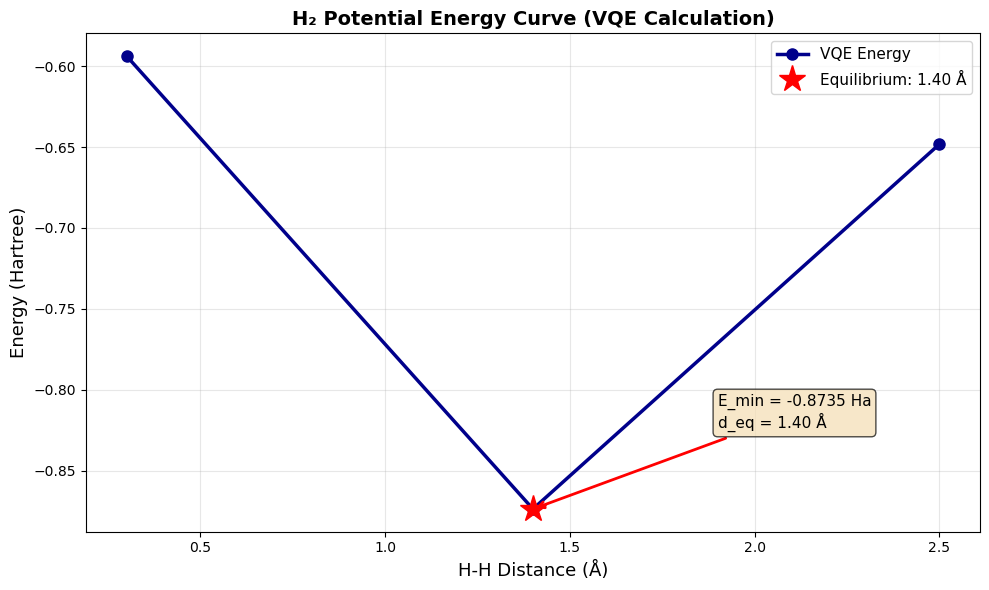


Equilibrium bond length: 1.40 Å
Ground state energy: -0.873455 Hartree
(Experimental: ~0.74 Å, ~-1.174 Ha for H2)


In [ ]:
print("\n--- Compute H2 Potential Energy Curve ---\n")

distances = np.linspace(0.3, 2.5, 3)
energies_h2 = []

for i, d in enumerate(distances):
    print(f"Distance {i+1}/{len(distances)}: {d:.2f} Å")
    
    vqe_h2 = VQE_H2_QNG(
        max_iter=150,
        learning_rate=0.05,
        store_history=False,
        reps=0,
        distance=d
    )
    
    n_params = (vqe_h2.reps + 1) * 4
    #theta_init = np.random.uniform(0, 2*np.pi, n_params)

    theta_init=np.zeros(n_params)
    for i in range(n_params):
        theta_init[i]=np.pi/n_params*i
    
    _, E_opt = vqe_h2.run(initial_params=theta_init)
    energies_h2.append(E_opt)
    print(f"  Energy: {E_opt:.6f} Ha\n")


    # Plot potential energy curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(distances, energies_h2, 'o-', linewidth=2.5, markersize=8, 
        color='darkblue', label='VQE Energy')

# Mark equilibrium distance
min_idx = np.argmin(energies_h2)
eq_distance = distances[min_idx]
eq_energy = energies_h2[min_idx]
ax.plot(eq_distance, eq_energy, 'r*', markersize=20, 
        label=f'Equilibrium: {eq_distance:.2f} Å')

ax.set_xlabel('H-H Distance (Å)', fontsize=13)
ax.set_ylabel('Energy (Hartree)', fontsize=13)
ax.set_title('H₂ Potential Energy Curve (VQE Calculation)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

# Add annotations
ax.annotate(f'E_min = {eq_energy:.4f} Ha\nd_eq = {eq_distance:.2f} Å',
            xy=(eq_distance, eq_energy), xytext=(eq_distance + 0.5, eq_energy + 0.05),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'h2_potential_curve.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Saved: {RESULTS_DIR / 'h2_potential_curve.png'}")
plt.show()

print(f"\nEquilibrium bond length: {eq_distance:.2f} Å")
print(f"Ground state energy: {eq_energy:.6f} Hartree")
print("(Experimental: ~0.74 Å, ~-1.174 Ha for H2)")
